# 4 - Train a YOLOv8 object detection model     
#    🖼️ +📝 --> 💻🧠  

<img width="1024" src="https://user-images.githubusercontent.com/26833433/212094133-6bb8c21c-3d47-41df-a512-81c5931054ae.png">


**OBJECTIVE:** The objective is to train a YOLOv8 **object detection** model ☝️. For more info on the YOLOv8 extensive documentation is available at their [github page](https://github.com/ultralytics/ultralytics) as well as in the [documentation page](https://docs.ultralytics.com/). YOLOv8 is a general framework that allows to solve tasks of [object detection](https://docs.ultralytics.com/tasks/detect/), [segmentation](https://docs.ultralytics.com/tasks/segment/), [classification](https://docs.ultralytics.com/tasks/classify/) and [pose estimation](https://docs.ultralytics.com/tasks/pose/) datasets. See [YOLOv8 Train Docs](https://docs.ultralytics.com/modes/train/) for more information.

**INPUT:**
- `path_to_tiles`= path to directory where train and validation directories (output from step 3) are stored.

**OUTPUT:**
- model weights that can be used for inference (prediction) on new data.

In [4]:
annotator_ID=99 # change this to your folder ID

path_to_tiles="/content/drive/MyDrive/NOVA_course_deep_learning_2/data/annotated_data/train/"+str(annotator_ID)

### 4.1 Switch on the GPU (if goolge allows :))
For model training we can massively speed up training time when using GPUs. Google Colab offers some free access to GPUs. They also offer some paying options if one wants to use it for larger models.

To switch the GPU on go to Edit > Notebook settings > select "GPU"

### 4.2 Setup YOLOv8 and import other libraries

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/requirements.txt) and check software and hardware.

In [5]:
%pip install ultralytics
import ultralytics
ultralytics.checks()
import yaml

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


... yes the setup is that easy :)

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 4.3 Create configuration file (.yaml) to pass for model training

In [6]:
config_data = {
    'path': path_to_tiles,
    'train': path_to_tiles+'/train/images',
    'val': path_to_tiles+'/val/images',
    'test':"/content/drive/MyDrive/NOVA_course_deep_learning_2/data/annotated_data/test/images", # this is by default
    'names': {
        0: 'tree'
    }
}

with open(path_to_tiles+'/train_config.yaml', 'w') as file:
    yaml.dump(config_data, file)

In [7]:
path_to_tiles+'/train_config.yaml'

'/content/drive/MyDrive/NOVA_course_deep_learning_2/data/annotated_data/train/99/train_config.yaml'

### 4.4 Train

Model training can be done either through the command line interface (CLI) or through python commands (see examples in [YOLOv8 docs](https://docs.ultralytics.com/modes/train/)). For this course we will use the CLI option as it is a bit more versatile in it's usage.

##### 4.4.1 with CLI

In [ ]:
!yolo train model=yolov8m.pt data=$path_to_tiles'/train_config.yaml' epochs=300 imgsz=1000

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/NOVA_course_deep_learning/data/annotated_data/train/17/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=1000, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=Tru

##### 4.4.2 Arguments that makes sense to potentially modify
- *model* (default=yolov8n.pt): COCO pre-trained model used as a base for transfer learning.
YOLOv8 offers five different model sizes: nano (yolov8n.pt), small (yolov8s.pt), medium (yolov8m.pt), large (yolov8l.pt), extra large (yolov8x.pt). The larger the model the better the performance but also the computational resources required to train and predict.

- *epochs* (default=3): number of epochs depends very much on the ammount of available data. Often, with small datasets overfitting begins after few epochs. Generally this can be set to 300 epoch on the first run and ensure that an early stop mechanism is in place (see parameter below).

- *patience* (default=50): epochs to wait for no observable improvement for early stopping of training. Generally ok to leave it to 50.

- *project*	(default=None): path to project to be stored on your drive (e.g. path_to_tiles/seedling_detection)

- *name* (default=None): name for specific model train run. This is used to separate each different training run and for experiment tracking.



  


Based on the variables above we can now create a more complete command

In [ ]:
!yolo train model=yolov8n.pt data=$path_to_tiles'/train_config.yaml' epochs=300 imgsz=1024 project=$path_to_tiles name="seedlings_YOLOn_img1024_annotatorID12" # test_YOLOn_img640

you will now find the results logged in the project/name folder and should be able to find it in google drive:
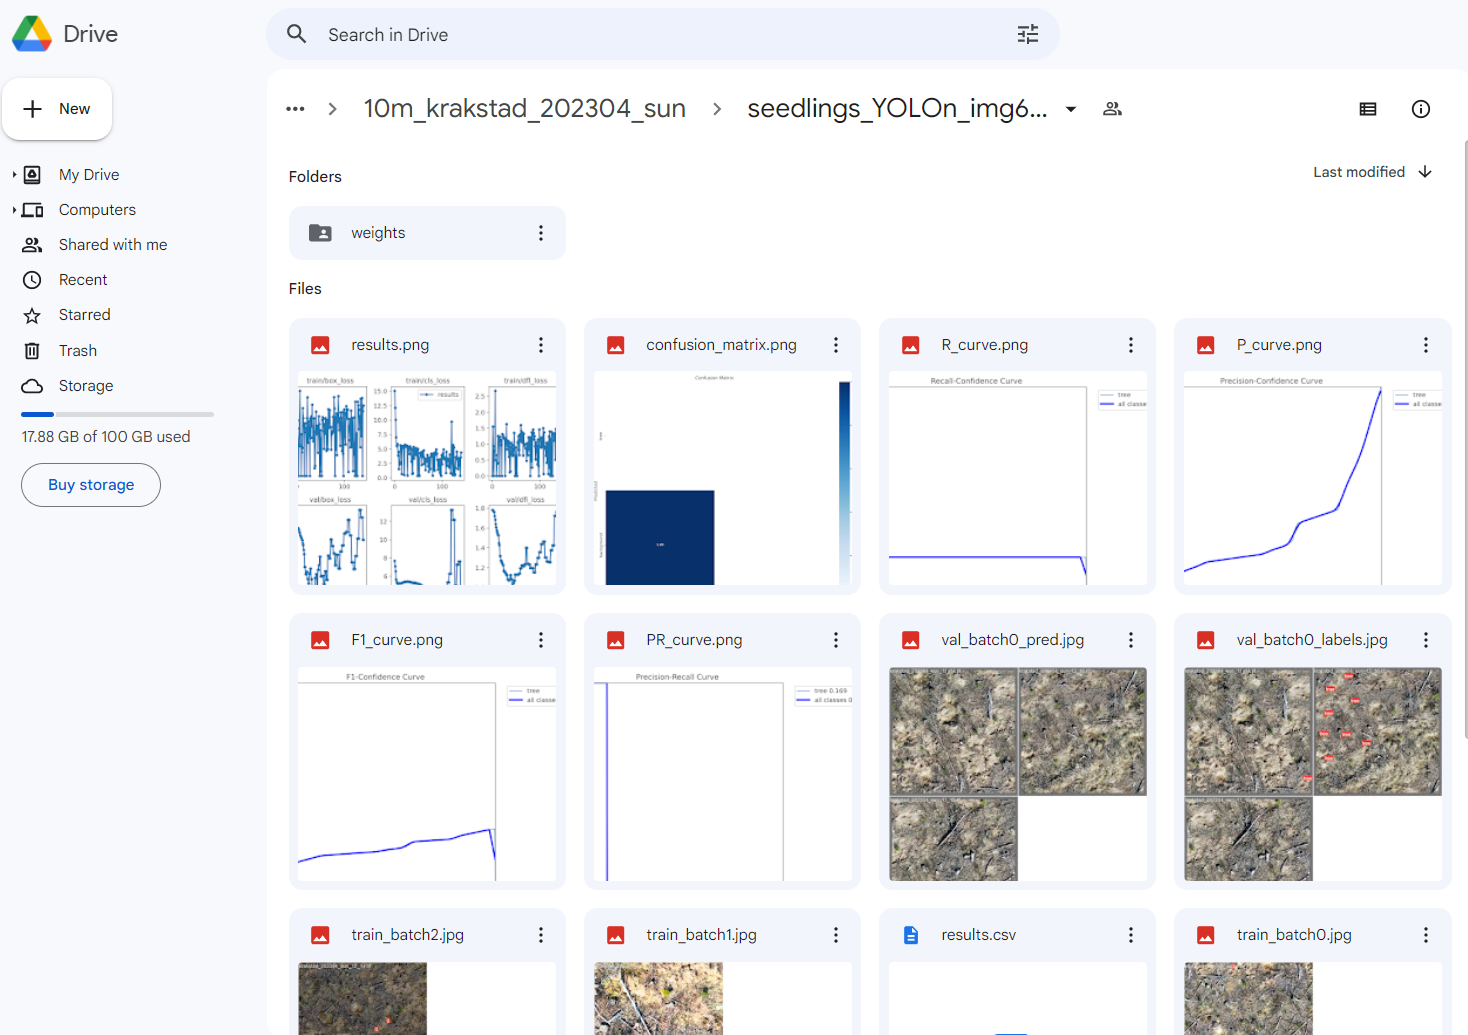

### 4.5 Experiment tracking
Experiment tracking is important when developing a deep learning model as it can be an iterative process.

Luckily there are many options available but for YOLOv8, one of the free and nice tools is [Comet](https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov8&utm_medium=partner&utm_content=github) ☄️

<img src="https://cdn.comet.ml/img/notebook_logo.png">


- First make a free Comet account at https://www.comet.com/site/lp/yolov5-with-comet/?utm_source=yolov8&utm_medium=partner&utm_content=github

- Install and import Comet

In [8]:
%pip install comet_ml --quiet
import comet_ml # in future scripts this should be pasted before importing the ultralytics library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.1/510.1 kB 43.5 MB/s eta 0:00:00


- initialize Comet project: this will require getting the API key from User settings in your Comet account:

In [9]:
comet_ml.init(project_name='seedling_detection_YOLOv8')

Please paste your Comet API key from https://www.comet.com/api/my/settings/
(api key may not show as you type)
Comet API key: ··········


COMET INFO: Valid Comet API Key saved in /content/drive/MyDrive/.comet.config (set COMET_CONFIG to change where it is saved).


- Now re-train the model and navigate to your Comet account and go to projects and you can visualize the results for each run under the same project

In [18]:
!yolo train model=yolov8s.pt data=$path_to_tiles'/train_config.yaml' epochs=300 imgsz=640 project=$path_to_tiles name="seedlings_YOLOs_img640" # test_YOLOs_img320

Ultralytics YOLOv8.0.124 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/NOVA_course_deep_learning_2/data/annotated_data/train/99/train_config.yaml, epochs=300, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/NOVA_course_deep_learning_2/data/annotated_data/train/99, name=seedlings_YOLOs_img640, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, v

- Comet allows for editing the different graphs so you can choose the ones you prefer --> try to replicate the graphs shown below:

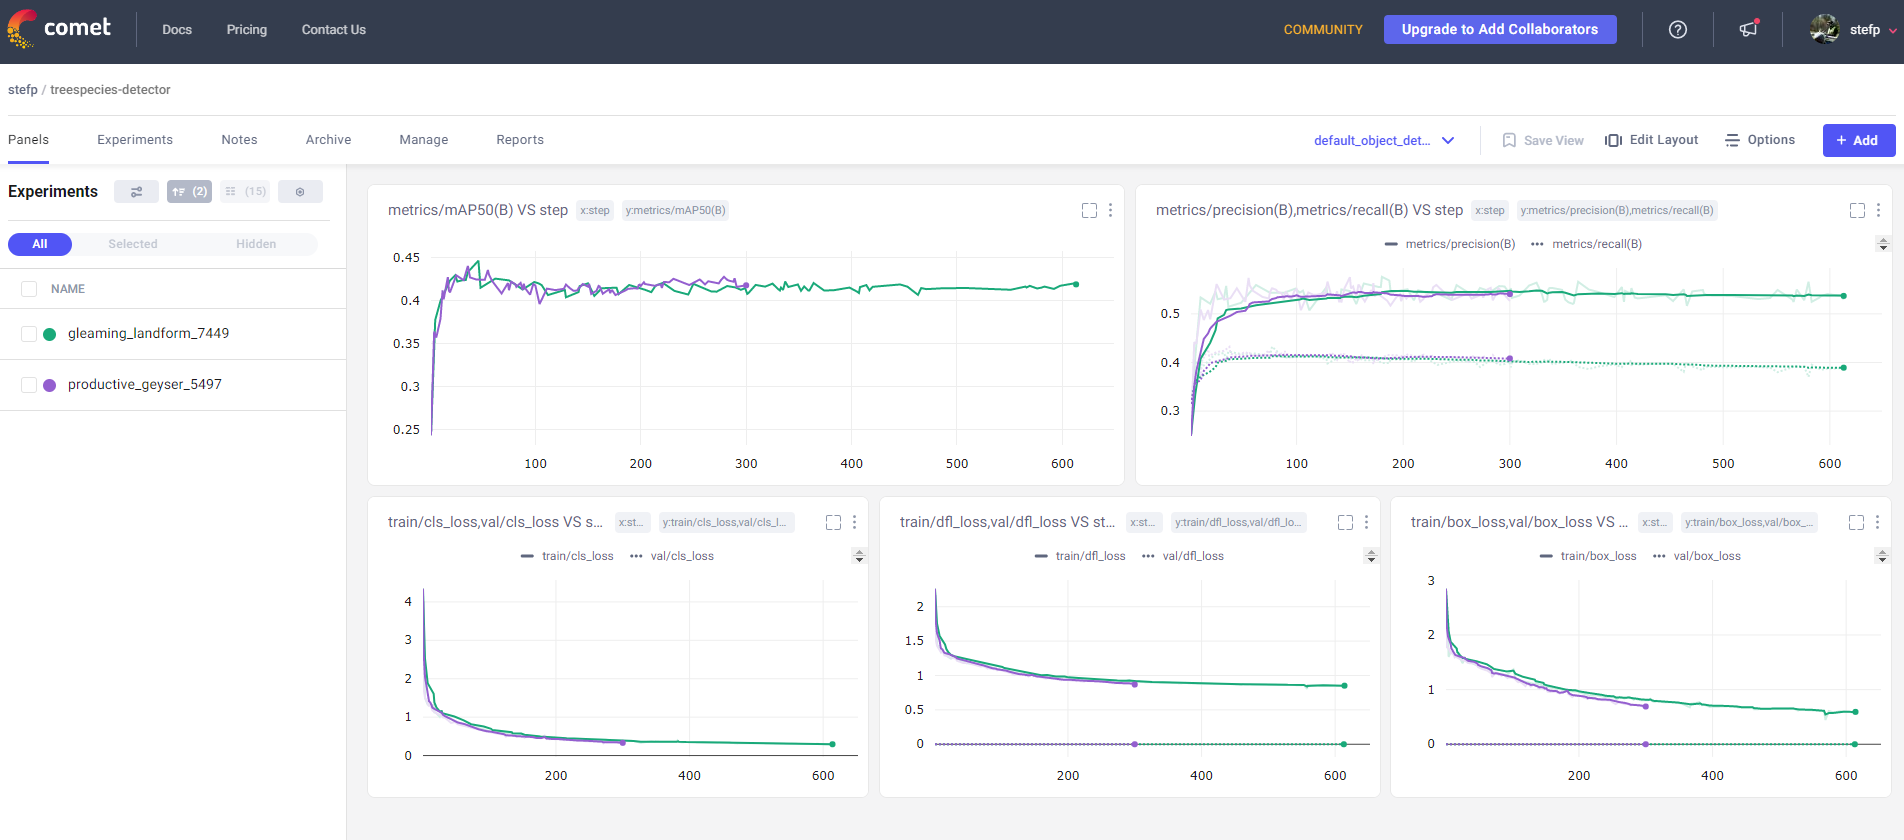

# The end! 🤯 Now let's continue with the fun and let's [predict with our newly trained model on new data](https://colab.research.google.com/drive/1tYCWg-o5C-h8C3jbV3UF-lj8uW0wjmZS)!